In [1]:
import code.model as model

from PIL import Image
import matplotlib.pyplot as plt

import itertools
import numpy as np
import time
import torch
from torch import nn, optim
import torch.nn.functional as F
import torchvision.transforms as tmf
import pandas as pd

# Dataloader prepare
from code.data_reader import get_loaders_and_datasets
from code.config import DATASET_NAME, epoch_round, validation_round, need_dump
# Get value which is static in one running 
from code.static import lp_method, device, get_net, set_net
if lp_method:
    print('use LP method')
else:
    print('use softmax')

print('device:', device)
print('dataset name:', DATASET_NAME)
print(f'Validate per {validation_round} round')
print(f'Limitation: {epoch_round} round.')

# Get data loaders
_loaders, _datasets = get_loaders_and_datasets()
train_loader, validate_loader, test_loader = _loaders
dataset_train, dataset_validate, dataset_test = _datasets
net, _ = get_net()

use LP method
device: cuda:0
dataset name: DRIVE
Validate per 5 round
Limitation: 1000 round.


In [2]:
from code.trainer import train

# Do the training
max_run_round = epoch_round
temp_statsrec, cmtensor = train(max_run_round, train_loader, validate_loader)

epoch 0 time Wed Oct 27 02:33:21 2021
epoch 1 time Wed Oct 27 02:33:39 2021
epoch 2 time Wed Oct 27 02:33:56 2021
epoch 3 time Wed Oct 27 02:34:13 2021
epoch 4 time Wed Oct 27 02:34:30 2021
Epoch:4 TrainLoss: 0.15161 ValidationLoss:  0.15280, Accuracy: 0.91844, Precision: 0.93130, Recall: 0.19570 F1: 0.32343, +: 93919, -: 4330564, False+: 385997, False-: 6928
epoch 5 time Wed Oct 27 02:34:51 2021
epoch 6 time Wed Oct 27 02:35:08 2021
epoch 7 time Wed Oct 27 02:35:26 2021
epoch 8 time Wed Oct 27 02:35:43 2021
epoch 9 time Wed Oct 27 02:36:00 2021
Epoch:9 TrainLoss: 0.10534 ValidationLoss:  0.12108, Accuracy: 0.93395, Precision: 0.92801, Recall: 0.36537 F1: 0.52431, +: 175346, -: 4323890, False+: 304570, False-: 13602
epoch 10 time Wed Oct 27 02:36:21 2021
epoch 11 time Wed Oct 27 02:36:38 2021
epoch 12 time Wed Oct 27 02:36:55 2021
epoch 13 time Wed Oct 27 02:37:12 2021
epoch 14 time Wed Oct 27 02:37:29 2021
Epoch:14 TrainLoss: 0.09681 ValidationLoss:  0.16720, Accuracy: 0.91607, Precis

epoch 112 time Wed Oct 27 03:06:47 2021
epoch 113 time Wed Oct 27 03:07:04 2021
epoch 114 time Wed Oct 27 03:07:21 2021
Epoch:114 TrainLoss: 0.05717 ValidationLoss:  0.04892, Accuracy: 0.96201, Precision: 0.82470, Recall: 0.78567 F1: 0.80471, +: 377054, -: 4257343, False+: 102862, False-: 80149
epoch 115 time Wed Oct 27 03:07:42 2021
epoch 116 time Wed Oct 27 03:07:59 2021
epoch 117 time Wed Oct 27 03:08:16 2021
epoch 118 time Wed Oct 27 03:08:33 2021
epoch 119 time Wed Oct 27 03:08:50 2021
Epoch:119 TrainLoss: 0.05567 ValidationLoss:  0.04391, Accuracy: 0.96341, Precision: 0.83785, Recall: 0.78458 F1: 0.81034, +: 376534, -: 4264623, False+: 103382, False-: 72869
epoch 120 time Wed Oct 27 03:09:10 2021
epoch 121 time Wed Oct 27 03:09:28 2021
epoch 122 time Wed Oct 27 03:09:45 2021
epoch 123 time Wed Oct 27 03:10:02 2021
epoch 124 time Wed Oct 27 03:10:19 2021
Epoch:124 TrainLoss: 0.05398 ValidationLoss:  0.06710, Accuracy: 0.95335, Precision: 0.85381, Recall: 0.64161 F1: 0.73265, +: 30

epoch 221 time Wed Oct 27 03:39:20 2021
epoch 222 time Wed Oct 27 03:39:37 2021
epoch 223 time Wed Oct 27 03:39:54 2021
epoch 224 time Wed Oct 27 03:40:11 2021
Epoch:224 TrainLoss: 0.04954 ValidationLoss:  0.04665, Accuracy: 0.96258, Precision: 0.88460, Recall: 0.71803 F1: 0.79266, +: 344594, -: 4292536, False+: 135322, False-: 44956
epoch 225 time Wed Oct 27 03:40:32 2021
epoch 226 time Wed Oct 27 03:40:49 2021
epoch 227 time Wed Oct 27 03:41:07 2021
epoch 228 time Wed Oct 27 03:41:24 2021
epoch 229 time Wed Oct 27 03:41:41 2021
Epoch:229 TrainLoss: 0.04890 ValidationLoss:  0.04156, Accuracy: 0.96431, Precision: 0.89089, Recall: 0.73136 F1: 0.80328, +: 350991, -: 4294503, False+: 128925, False-: 42989
epoch 230 time Wed Oct 27 03:42:02 2021
epoch 231 time Wed Oct 27 03:42:19 2021
epoch 232 time Wed Oct 27 03:42:36 2021
epoch 233 time Wed Oct 27 03:42:54 2021
epoch 234 time Wed Oct 27 03:43:12 2021
Epoch:234 TrainLoss: 0.05061 ValidationLoss:  0.04908, Accuracy: 0.96115, Precision: 0.9

epoch 331 time Wed Oct 27 04:12:12 2021
epoch 332 time Wed Oct 27 04:12:29 2021
epoch 333 time Wed Oct 27 04:12:47 2021
epoch 334 time Wed Oct 27 04:13:04 2021
Epoch:334 TrainLoss: 0.04582 ValidationLoss:  0.03941, Accuracy: 0.96593, Precision: 0.87042, Recall: 0.77310 F1: 0.81888, +: 371022, -: 4282258, False+: 108894, False-: 55234
epoch 335 time Wed Oct 27 04:13:25 2021
epoch 336 time Wed Oct 27 04:13:42 2021
epoch 337 time Wed Oct 27 04:13:59 2021
epoch 338 time Wed Oct 27 04:14:16 2021
epoch 339 time Wed Oct 27 04:14:33 2021
Epoch:339 TrainLoss: 0.04636 ValidationLoss:  0.04037, Accuracy: 0.96527, Precision: 0.89284, Recall: 0.74026 F1: 0.80942, +: 355261, -: 4294854, False+: 124655, False-: 42638
epoch 340 time Wed Oct 27 04:14:54 2021
epoch 341 time Wed Oct 27 04:15:11 2021
epoch 342 time Wed Oct 27 04:15:28 2021
epoch 343 time Wed Oct 27 04:15:45 2021
epoch 344 time Wed Oct 27 04:16:02 2021
Epoch:344 TrainLoss: 0.04582 ValidationLoss:  0.04055, Accuracy: 0.96528, Precision: 0.8

epoch 441 time Wed Oct 27 04:45:04 2021
epoch 442 time Wed Oct 27 04:45:21 2021
epoch 443 time Wed Oct 27 04:45:38 2021
epoch 444 time Wed Oct 27 04:45:55 2021
Epoch:444 TrainLoss: 0.04120 ValidationLoss:  0.04206, Accuracy: 0.96509, Precision: 0.88144, Recall: 0.75054 F1: 0.81074, +: 360197, -: 4289042, False+: 119719, False-: 48450
epoch 445 time Wed Oct 27 04:46:16 2021
epoch 446 time Wed Oct 27 04:46:33 2021
epoch 447 time Wed Oct 27 04:46:50 2021
epoch 448 time Wed Oct 27 04:47:07 2021
epoch 449 time Wed Oct 27 04:47:24 2021
Epoch:449 TrainLoss: 0.04083 ValidationLoss:  0.04295, Accuracy: 0.96444, Precision: 0.87636, Recall: 0.74863 F1: 0.80748, +: 359278, -: 4286806, False+: 120638, False-: 50686
epoch 450 time Wed Oct 27 04:47:45 2021
epoch 451 time Wed Oct 27 04:48:02 2021
epoch 452 time Wed Oct 27 04:48:20 2021
epoch 453 time Wed Oct 27 04:48:37 2021
epoch 454 time Wed Oct 27 04:48:54 2021
Epoch:454 TrainLoss: 0.03985 ValidationLoss:  0.04283, Accuracy: 0.96440, Precision: 0.8

epoch 551 time Wed Oct 27 05:17:54 2021
epoch 552 time Wed Oct 27 05:18:11 2021
epoch 553 time Wed Oct 27 05:18:28 2021
epoch 554 time Wed Oct 27 05:18:45 2021
Epoch:554 TrainLoss: 0.03673 ValidationLoss:  0.04188, Accuracy: 0.96493, Precision: 0.86189, Recall: 0.77157 F1: 0.81423, +: 370287, -: 4278156, False+: 109629, False-: 59336
epoch 555 time Wed Oct 27 05:19:06 2021
epoch 556 time Wed Oct 27 05:19:23 2021
epoch 557 time Wed Oct 27 05:19:41 2021
epoch 558 time Wed Oct 27 05:19:58 2021
epoch 559 time Wed Oct 27 05:20:15 2021
Epoch:559 TrainLoss: 0.03624 ValidationLoss:  0.04390, Accuracy: 0.96384, Precision: 0.86816, Recall: 0.75103 F1: 0.80536, +: 360432, -: 4282757, False+: 119484, False-: 54735
epoch 560 time Wed Oct 27 05:20:36 2021
epoch 561 time Wed Oct 27 05:20:53 2021
epoch 562 time Wed Oct 27 05:21:11 2021
epoch 563 time Wed Oct 27 05:21:28 2021
epoch 564 time Wed Oct 27 05:21:45 2021
Epoch:564 TrainLoss: 0.03497 ValidationLoss:  0.04277, Accuracy: 0.96452, Precision: 0.8

epoch 661 time Wed Oct 27 05:50:43 2021
epoch 662 time Wed Oct 27 05:51:00 2021
epoch 663 time Wed Oct 27 05:51:17 2021
epoch 664 time Wed Oct 27 05:51:35 2021
Epoch:664 TrainLoss: 0.03110 ValidationLoss:  0.04405, Accuracy: 0.96359, Precision: 0.84962, Recall: 0.77102 F1: 0.80841, +: 370025, -: 4271999, False+: 109891, False-: 65493
epoch 665 time Wed Oct 27 05:51:55 2021
epoch 666 time Wed Oct 27 05:52:12 2021
epoch 667 time Wed Oct 27 05:52:30 2021
epoch 668 time Wed Oct 27 05:52:47 2021
epoch 669 time Wed Oct 27 05:53:04 2021
Epoch:669 TrainLoss: 0.02993 ValidationLoss:  0.04433, Accuracy: 0.96311, Precision: 0.87845, Recall: 0.73079 F1: 0.79784, +: 350716, -: 4288962, False+: 129200, False-: 48530
epoch 670 time Wed Oct 27 05:53:25 2021
epoch 671 time Wed Oct 27 05:53:42 2021
epoch 672 time Wed Oct 27 05:53:59 2021
epoch 673 time Wed Oct 27 05:54:17 2021
epoch 674 time Wed Oct 27 05:54:34 2021
Epoch:674 TrainLoss: 0.02909 ValidationLoss:  0.04622, Accuracy: 0.96277, Precision: 0.8

epoch 771 time Wed Oct 27 06:23:33 2021
epoch 772 time Wed Oct 27 06:23:50 2021
epoch 773 time Wed Oct 27 06:24:07 2021
epoch 774 time Wed Oct 27 06:24:24 2021
Epoch:774 TrainLoss: 0.02461 ValidationLoss:  0.04579, Accuracy: 0.96245, Precision: 0.86293, Recall: 0.74072 F1: 0.79717, +: 355481, -: 4281027, False+: 124435, False-: 56465
epoch 775 time Wed Oct 27 06:24:45 2021
epoch 776 time Wed Oct 27 06:25:02 2021
epoch 777 time Wed Oct 27 06:25:19 2021
epoch 778 time Wed Oct 27 06:25:36 2021
epoch 779 time Wed Oct 27 06:25:54 2021
Epoch:779 TrainLoss: 0.02377 ValidationLoss:  0.04453, Accuracy: 0.96343, Precision: 0.85518, Recall: 0.76198 F1: 0.80590, +: 365687, -: 4275565, False+: 114229, False-: 61927
epoch 780 time Wed Oct 27 06:26:15 2021
epoch 781 time Wed Oct 27 06:26:32 2021
epoch 782 time Wed Oct 27 06:26:50 2021
epoch 783 time Wed Oct 27 06:27:07 2021
epoch 784 time Wed Oct 27 06:27:24 2021
Epoch:784 TrainLoss: 0.02370 ValidationLoss:  0.04549, Accuracy: 0.96278, Precision: 0.8

epoch 881 time Wed Oct 27 06:56:24 2021
epoch 882 time Wed Oct 27 06:56:41 2021
epoch 883 time Wed Oct 27 06:56:58 2021
epoch 884 time Wed Oct 27 06:57:16 2021
Epoch:884 TrainLoss: 0.02006 ValidationLoss:  0.04617, Accuracy: 0.96245, Precision: 0.84780, Recall: 0.75940 F1: 0.80117, +: 364449, -: 4272063, False+: 115467, False-: 65429
epoch 885 time Wed Oct 27 06:57:37 2021
epoch 886 time Wed Oct 27 06:57:54 2021
epoch 887 time Wed Oct 27 06:58:11 2021
epoch 888 time Wed Oct 27 06:58:28 2021
epoch 889 time Wed Oct 27 06:58:45 2021
Epoch:889 TrainLoss: 0.01965 ValidationLoss:  0.04641, Accuracy: 0.96237, Precision: 0.85845, Recall: 0.74512 F1: 0.79778, +: 357593, -: 4278527, False+: 122323, False-: 58965
epoch 890 time Wed Oct 27 06:59:06 2021
epoch 891 time Wed Oct 27 06:59:23 2021
epoch 892 time Wed Oct 27 06:59:41 2021
epoch 893 time Wed Oct 27 06:59:58 2021
epoch 894 time Wed Oct 27 07:00:15 2021
Epoch:894 TrainLoss: 0.02047 ValidationLoss:  0.04694, Accuracy: 0.96199, Precision: 0.8

epoch 991 time Wed Oct 27 07:29:15 2021
epoch 992 time Wed Oct 27 07:29:32 2021
epoch 993 time Wed Oct 27 07:29:49 2021
epoch 994 time Wed Oct 27 07:30:07 2021
Epoch:994 TrainLoss: 0.01837 ValidationLoss:  0.04707, Accuracy: 0.96150, Precision: 0.85384, Recall: 0.74023 F1: 0.79299, +: 355250, -: 4276679, False+: 124666, False-: 60813
epoch 995 time Wed Oct 27 07:30:27 2021
epoch 996 time Wed Oct 27 07:30:45 2021
epoch 997 time Wed Oct 27 07:31:02 2021
epoch 998 time Wed Oct 27 07:31:19 2021
epoch 999 time Wed Oct 27 07:31:36 2021
Epoch:999 TrainLoss: 0.01742 ValidationLoss:  0.04693, Accuracy: 0.96210, Precision: 0.85681, Recall: 0.74383 F1: 0.79633, +: 356978, -: 4277833, False+: 122938, False-: 59659


statsrec [[0.15161354 0.10533526 0.09681057 ... 0.01810543 0.01836792 0.01741518]
 [0.15280301 0.12108485 0.16720462 ... 0.0474241  0.04706522 0.04693098]
 [0.91843641 0.9339537  0.91607124 ... 0.96163583 0.9614982  0.96209639]
 [0.93130189 0.92801195 0.98291832 ... 0.85317802 0.85383701 0.85680819]
 [0.19569883 0.3653681  0.16030721 ... 0.74271125 0.74023372 0.74383432]
 [0.32343313 0.52430987 0.27565673 ... 0.79412138 0.79298735 0.79633439]]
0, 0.15161353846391043, 0.1528030103072524, 0.9184364080429077, 0.9313018918037415, 0.1956988275051117, 0.32343313097953796
1, 0.10533525981009007, 0.12108484702184796, 0.9339537024497986, 0.928011953830719, 0.3653680980205536, 0.5243098735809326
2, 0.09681057122846444, 0.16720462404191494, 0.9160712361335754, 0.9829183220863342, 0.16030721366405487, 0.27565672993659973
3, 0.08589934309323628, 0.07334389677271247, 0.9517975449562073, 0.801446259021759, 0.6861263513565063, 0.7393163442611694
4, 0.07891811989247799, 0.08569466252811253, 0.945681154

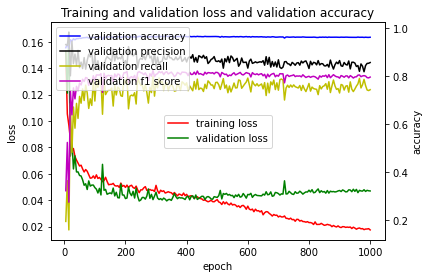

In [3]:
print('statsrec', temp_statsrec)

for i in range(len(temp_statsrec[0])):
    line1 = f'{i}'
    for j in range(6):
        line1 = f'{line1}, {temp_statsrec[j][i]}'
    print(line1)
min_loss = 1
min_index = 0
for i in range(0, len(temp_statsrec[0])):
    if min_loss > temp_statsrec[1][i]:
        min_loss = temp_statsrec[1][i]
        min_index = i

best_epoch = (min_index + 1) * validation_round
print(f'All epoch: {max_run_round}, Best epoch: {best_epoch}, Min loss:{min_loss}, Min index:{min_index} validation round:{validation_round}')

#visulize the accuracy and the training loss and the validation loss
fig, ax1 = plt.subplots()
x_ = [validation_round*(p+1)for p in range(0, len(temp_statsrec[0]))]
plt.plot(x_, temp_statsrec[0], 'r', label = 'training loss', )
plt.plot(x_, temp_statsrec[1], 'g', label = 'validation loss' )
plt.legend(loc='center')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Training and validation loss and validation accuracy')
ax2=ax1.twinx()
ax2.plot(x_, temp_statsrec[2], 'b', label = 'validation accuracy')
ax2.plot(x_, temp_statsrec[3], 'k', label = 'validation precision')
ax2.plot(x_, temp_statsrec[4], 'y', label = 'validation recall')
ax2.plot(x_, temp_statsrec[5], 'm', label = 'validation f1 score')
ax2.set_ylabel('accuracy')
plt.legend(loc='upper left')
plt.show()

In [4]:
def load_checkpoint(path):
    from code.model import UNet
    model_checkpoint = torch.load(path)
    #print('model_checkpoint',model_checkpoint)
    #net2 = UNet(3,2)
    #print('model_checkpoint', type(model_checkpoint), model_checkpoint)
    #net_part = model_checkpoint['state_dict']
    #print('net_part',net_part)
    #net2.load_state_dict(net_part)
   # net2.load_state_dict(model_checkpoint['state_dict'])
    
    return model_checkpoint.to(device)
    #optimizer.load_state_dict(model_checkpoint['optimizer'])
    #return model, optimizer

net2 = load_checkpoint(f'models/{best_epoch:05d}.pkl')
set_net(net2, 123)
net = net2

In [5]:
from code.trainer import predict_method, calc_loss


statsrec1 = [[],[],[],[],[],[],[],[]]
if not lp_method:
    all_outputs = []
    net.eval()
    with torch.no_grad():
        for i, data in enumerate(validate_loader, 0):
            inputs_cpu, labels_cpu, _ = data
            inputs, labels = inputs_cpu.to(device), labels_cpu.to(device)
                
            outputs = net(inputs)
            outputs = F.softmax(outputs, 1)
            outputs = outputs.permute(1, 0, 2, 3)
            outputs = outputs[1]
            labels = labels.int()
            all_outputs.append((outputs, labels))

    for i in range(100):
        threshold = 0.01 * i
        positive, negative, false_negative, false_positive = 0, 0, 0, 0
        for outputs, labels in all_outputs:
            #print('sum', outputs.shape, outputs.sum())
            predicted = torch.where(outputs>threshold, 1, 0)
            #_, predicted = torch.max(outputs, 1)
            #labels = images.long()
            predicted = predicted.int()
            zeros = torch.zeros(labels.shape).to(device).int()
            #print('images1', images1)
            not_labels = 1 - labels
            positive       += torch.where(predicted==labels, labels, zeros).sum()
            negative       += torch.where(predicted==labels, not_labels, zeros).sum()
            false_negative += torch.where(predicted!=labels, labels, zeros).sum()
            false_positive += torch.where(predicted!=labels, not_labels, zeros).sum()
            #print(positive_right, negative_right, positive_wrong, negative_wrong)
        #print(threshold, positive_right, negative_right, positive_wrong, negative_wrong)
        statsrec1[0].append(positive)    
        statsrec1[1].append(negative)    
        statsrec1[2].append(false_negative)    
        statsrec1[3].append(false_positive)   
        

In [6]:
from PIL import Image
import matplotlib.pyplot as plt


for p in range(4):
    statsrec1[p] = [q.cpu() for q in statsrec1[p]]
    print(f'statsrec1{p}:')
    temp_str = ''.join([f'({q},{statsrec1[p][q]})' for q in range(len(statsrec1[p]))])
    print(temp_str)

def draw_threshold_pics():
    #print('statsrec', statsrec)
    #visulize the accuracy and the training loss and the validation loss
    fig, ax1 = plt.subplots()
    plt.plot(statsrec1[0], 'r', label = 'positive', )
    plt.plot(statsrec1[1], 'g', label = 'negative' )
    plt.plot(statsrec1[2], 'b', label = 'false negative' )
    plt.plot(statsrec1[3], 'y', label = 'false positive' )
    #print('stat',statsrec)
    plt.legend(loc='center')
    plt.xlabel('threshold(%)')
    plt.ylabel('count')
    plt.title('Threshold')
    #ax2=ax1.twinx()
    #ax2.plot(statsrec[2], 'b', label = 'validation accuracy')
    #ax2.set_ylabel('accuracy')
    #plt.legend(loc='upper left')
    plt.show()

    fig, ax1 = plt.subplots()
    plt.plot(statsrec1[0], 'r', label = 'positive', )
    plt.legend(loc='center')
    plt.xlabel('threshold(%)')
    plt.ylabel('count')
    plt.title('Threshold')
    plt.show()

    fig, ax1 = plt.subplots()
    plt.plot(statsrec1[1], 'g', label = 'negative' )
    plt.legend(loc='center')
    plt.xlabel('threshold(%)')
    plt.ylabel('count')
    plt.title('Threshold')
    plt.show()

    fig, ax1 = plt.subplots()
    plt.plot(statsrec1[2], 'b', label = 'false negative' )
    plt.legend(loc='center')
    plt.xlabel('threshold(%)')
    plt.ylabel('count')
    plt.title('Threshold')
    plt.show()

    fig, ax1 = plt.subplots()
    plt.plot(statsrec1[3], 'y', label = 'false positive' )
    plt.legend(loc='center')
    plt.xlabel('threshold(%)')
    plt.ylabel('count')
    plt.title('Threshold')
    plt.show()

if not lp_method:
    draw_threshold_pics()

statsrec10:

statsrec11:

statsrec12:

statsrec13:



In [7]:
max_threshold = 0
max_f1 = 0
if not lp_method:
    precisions = []
    recalls = []
    accs = []
    f1s = []
    for p in range(len(statsrec1[0])):
        acc1 = (statsrec1[0][p] + statsrec1[1][p]) / (statsrec1[0][p] + statsrec1[1][p] + statsrec1[2][p] + statsrec1[3][p])
        accs.append(acc1.numpy())
        precision1 = statsrec1[0][p]  / (statsrec1[0][p] + statsrec1[2][p])
        precisions.append(precision1.numpy())
        recall1 = statsrec1[0][p]  / (statsrec1[0][p] + statsrec1[3][p])
        recalls.append(recall1.numpy())
        f1_score = 2*precision1*recall1/(precision1+recall1)
        f1s.append(f1_score.numpy())
        #print('f1_score',f1_score.numpy())
        if max_f1 < f1_score.numpy():
            max_f1 = f1_score.numpy()
            max_threshold = p * 0.01
    print(f'max threshold:{max_threshold}, max f1 score:{max_f1}')

    fig, ax1 = plt.subplots()
    plt.plot(accs, 'r', label = 'accuracy', )
    plt.plot(recalls, 'g', label = 'recall', )
    plt.plot(precisions, 'b', label = 'precision', )
    plt.plot(f1s, 'k', label = 'f1 score', )
    plt.legend(loc='center')
    plt.xlabel('threshold(%)')
    plt.ylabel('%')
    plt.title('Threshold')
    #ax2=ax1.twinx()
    #ax2.plot(statsrec[2], 'b', label = 'validation accuracy')
    #ax2.set_ylabel('accuracy')
    #plt.legend(loc='upper left')
    plt.show()


In [8]:
##visulaize the confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix of valiation set', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Threshold: 0.5, Accuracy: 0.9658477902, Precision: 0.8677968979, Recall: 0.7752898335, F1: 0.8189392686
Confusion matrix, without normalization
tensor([[4280809,   56683],
        [ 107842,  372074]], dtype=torch.int32)


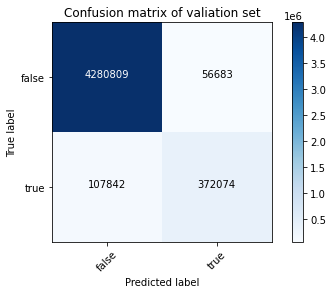

In [9]:
from code.trainer import test_one_batch

ltst, positive, negative, false_negative, false_positive = test_one_batch(validate_loader, False)

right = positive + negative
wrong = false_negative + false_positive
total = right + wrong
accuracy = right / total
precision = positive / (positive + false_positive)
recall = positive / (positive + false_negative)
print(f'Threshold: 0.5, Accuracy:{accuracy: .10f}, Precision:{precision: .10f}, Recall:{recall: .10f}, F1:{2*precision*recall/(precision+recall): .10f}')

cmt = torch.Tensor([
    [negative, false_positive],
    [false_negative, positive],
]).int()

plot_confusion_matrix(cmt, ['false', 'true'])

In [10]:
from code.trainer import test_with_threshold

if not lp_method:
    positive, negative, false_negative, false_positive = test_with_threshold(validate_loader, False, max_threshold)

    right = positive + negative
    wrong = false_negative + false_positive
    total = right + wrong
    accuracy = right / total
    precision = positive / (positive + false_positive)
    recall = positive / (positive + false_negative)
    print(f'Threshold: {max_threshold}, Accuracy:{accuracy: .10f}, Precision:{precision: .10f}, Recall:{recall: .10f}, F1:{2*precision*recall/(precision+recall): .10f}')


    cmt = torch.Tensor([
        [negative, false_positive],
        [false_negative, positive],
    ]).int()

    plot_confusion_matrix(cmt, ['false', 'true'])

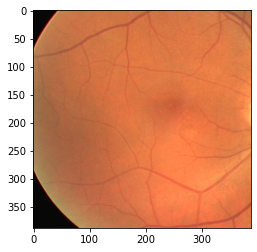

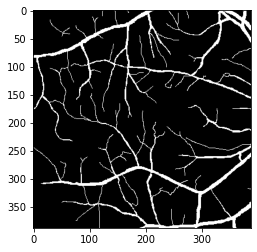

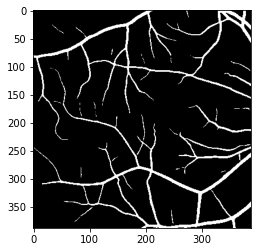

In [11]:
from code.draw_helper import draw_one_area

# draw one sample patch
data_image, label_image, predicted_image = draw_one_area(dataset_test, 0, max_threshold)

plt.imshow(data_image)
plt.show()

plt.imshow(label_image)
plt.show()

plt.imshow(predicted_image)
plt.show()

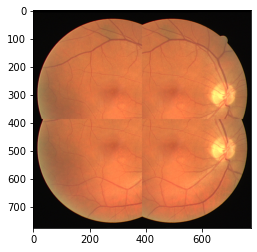

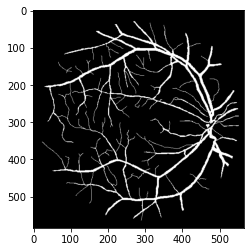

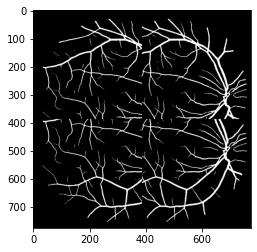

In [12]:
from code.draw_helper import draw_patches


data_image, label_image, predicted_image = draw_patches(dataset_test, 0, max_threshold)

plt.imshow(data_image)
plt.show()

plt.imshow(label_image)
plt.show()

plt.imshow(predicted_image)
plt.show()

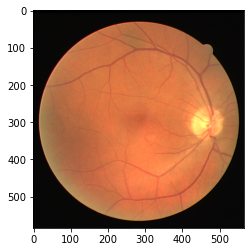

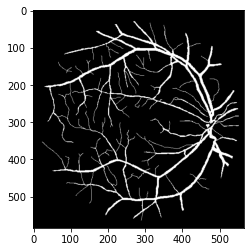

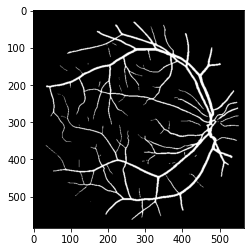

In [13]:
from code.draw_helper import draw_full


data_image, label_image, predicted_image = draw_full(dataset_test, 0, max_threshold)

plt.imshow(data_image)
plt.show()

plt.imshow(label_image)
plt.show()

plt.imshow(predicted_image)
plt.show()

len 8 6 4


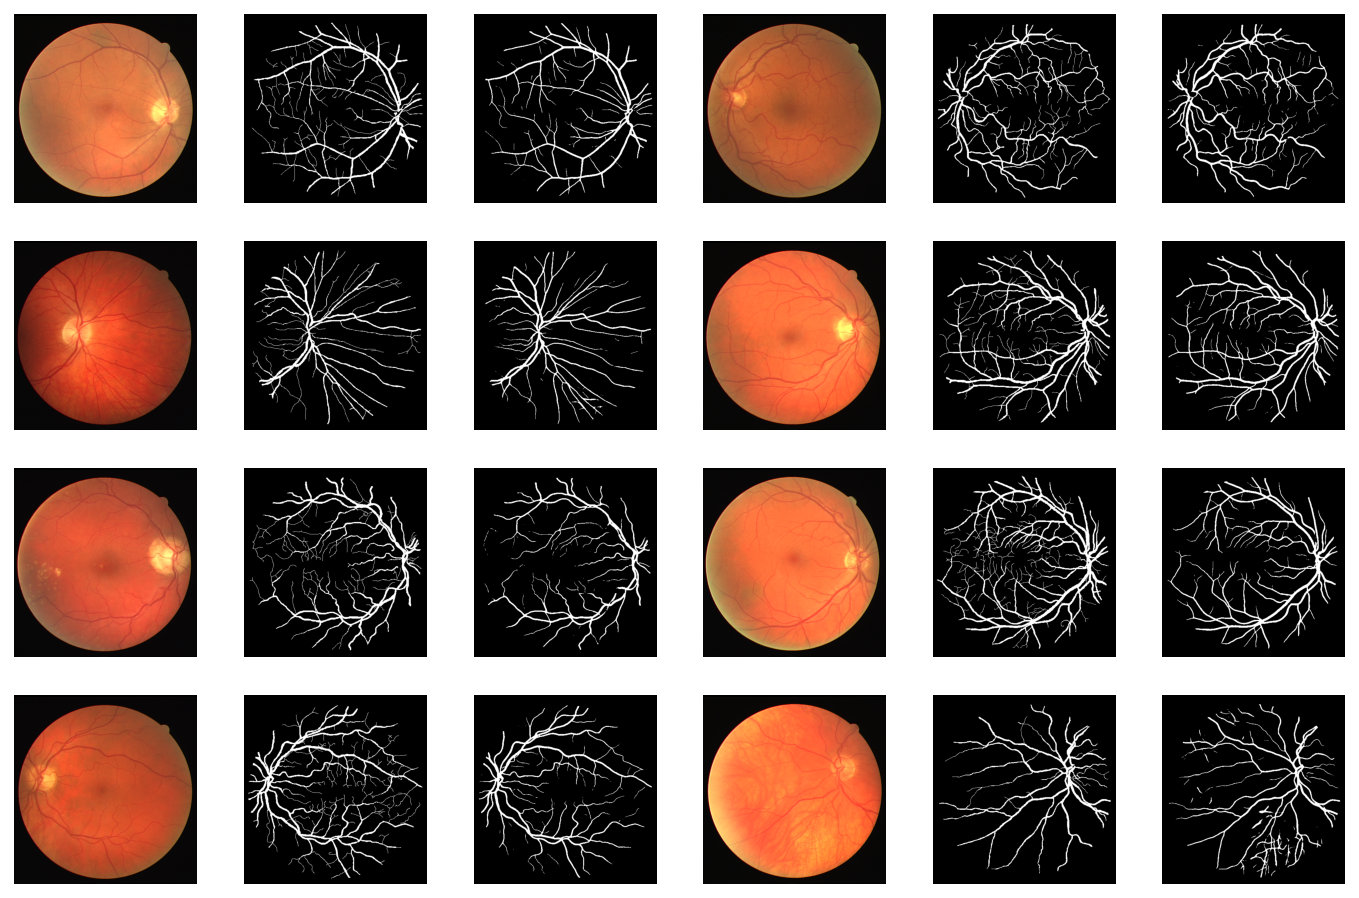

In [14]:
import matplotlib.pylab as plt
from code.draw_helper import draw_full
%matplotlib inline
%config InlineBackend.figure_formats = set(['retina'])

test_len = dataset_test.length()
index = 1
colomn_number = 2
line_number = (test_len - 1)//colomn_number + 1
colomn_number = colomn_number * 3

print('len', test_len, colomn_number, line_number)
plt.figure(3, figsize=(12,8))
for i in range(test_len):
    data_image, label_image, predicted_image = draw_full(dataset_test, i, max_threshold)
    for q in [data_image, label_image, predicted_image]:
        #plt.subplot(line_number, colomn_number, index)
        plt.subplot(4, 6, index)
        index = index + 1
        plt.imshow(q)
        plt.xticks([])
        plt.yticks([])
        plt.axis('off')
plt.show()

Confusion matrix, without normalization
tensor([[4273299,   62830],
        [ 112614,  368665]], dtype=torch.int32)
Threshold: 0.5, Accuracy: 0.9635812640, Precision: 0.8543899655, Recall: 0.7660109997, F1: 0.8077903390
+  1,  103441/  249166=0.41514893685334275
+  2,    7876/  136352=0.05776226237972307
+  3,     703/   64830=0.010843745179700756
+  4,     302/   22466=0.013442535386806731
+  5,     163/    6173=0.026405313461849992
+  6,      87/    1834=0.04743729552889858
+  7,      27/     381=0.07086614173228346
+  8,      13/      65=0.2
+  9,       2/      10=0.2
+ 10,       0/       2=0.0
-  1,   49019/  287612=0.17043447422221605
-  2,    3993/  271587=0.01470247103138221
-  3,     527/  257594=0.002045855105320776
-  4,     296/  243584=0.0012151865475564898
-  5,     280/  229054=0.0012224191675325468
-  6,     320/  214492=0.001491897133692632
-  7,     345/  198986=0.001733790316906717
-  8,     364/  183905=0.0019792827818710746
-  9,     304/  169655=0.00179187173970705

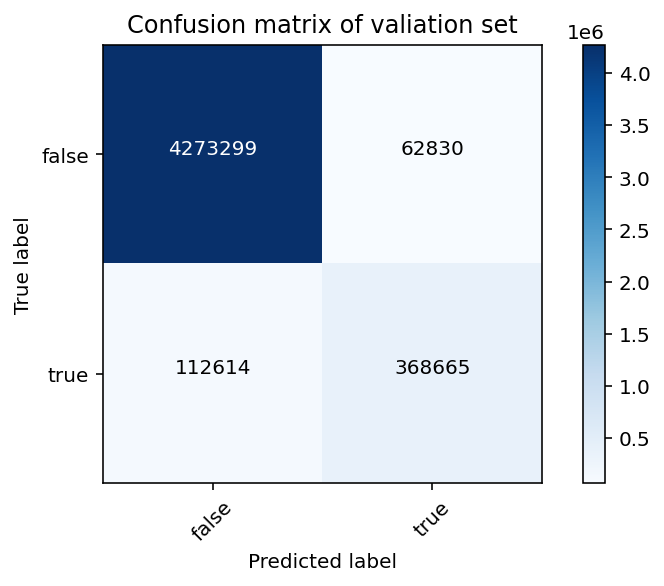

In [15]:
from code.trainer import test_one_batch

ltst, positive, negative, false_negative, false_positive, was, als = test_one_batch(test_loader, True)

right = positive + negative
wrong = false_negative + false_positive
total = right + wrong
accuracy = right / total
precision = positive / (positive + false_positive)
recall = positive / (positive + false_negative)

cmt = torch.Tensor([
    [negative, false_positive],
    [false_negative, positive],
]).int()

plot_confusion_matrix(cmt, ['false', 'true'])

print(f'Threshold: 0.5, Accuracy:{accuracy: .10f}, Precision:{precision: .10f}, Recall:{recall: .10f}, F1:{2*precision*recall/(precision+recall): .10f}')
#print('was', was, als)
for p in range(200):
    if als[1000+p] != 0:
        print(f'+{p:3d},{was[1000+p]:8d}/{als[1000+p]:8d}={was[1000+p]/als[1000+p]}')

for p in range(200):
    if als[1000-p] != 0:
        print(f'-{p:3d},{was[1000-p]:8d}/{als[1000-p]:8d}={was[1000-p]/als[1000-p]}')

Confusion matrix, without normalization
tensor([[4273299,   62830],
        [ 112614,  368665]], dtype=torch.int32)
Threshold: 0, Accuracy: 0.9635812640, Precision: 0.8543899655, Recall: 0.7660109997, F1: 0.8077903390
+  1,  103441/  249166=0.41514893685334275
+  2,    7876/  136352=0.05776226237972307
+  3,     703/   64830=0.010843745179700756
+  4,     302/   22466=0.013442535386806731
+  5,     163/    6173=0.026405313461849992
+  6,      87/    1834=0.04743729552889858
+  7,      27/     381=0.07086614173228346
+  8,      13/      65=0.2
+  9,       2/      10=0.2
+ 10,       0/       2=0.0
-  1,   49019/  287612=0.17043447422221605
-  2,    3993/  271587=0.01470247103138221
-  3,     527/  257594=0.002045855105320776
-  4,     296/  243584=0.0012151865475564898
-  5,     280/  229054=0.0012224191675325468
-  6,     320/  214492=0.001491897133692632
-  7,     345/  198986=0.001733790316906717
-  8,     364/  183905=0.0019792827818710746
-  9,     304/  169655=0.0017918717397070526

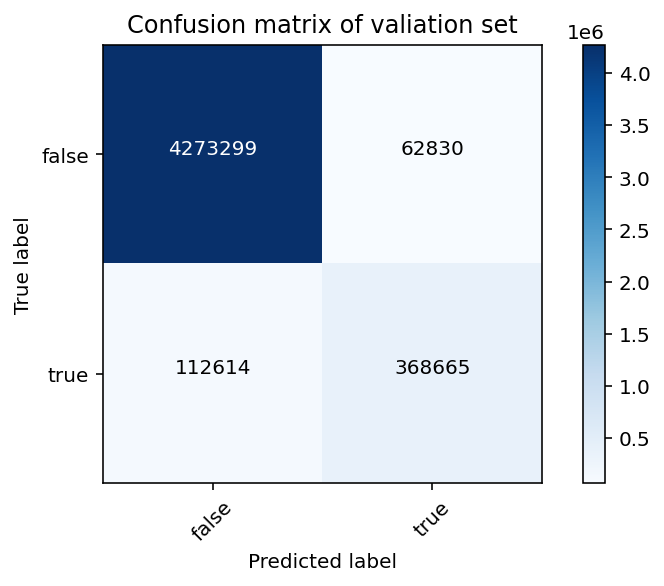

In [16]:
from code.trainer import test_one_batch

positive, negative, false_negative, false_positive, was, als = test_with_threshold(test_loader, True, max_threshold)

right = positive + negative
wrong = false_negative + false_positive
total = right + wrong
accuracy = right / total
precision = positive / (positive + false_positive)
recall = positive / (positive + false_negative)

cmt = torch.Tensor([
    [negative, false_positive],
    [false_negative, positive],
]).int()

plot_confusion_matrix(cmt, ['false', 'true'])

print(f'Threshold: {max_threshold}, Accuracy:{accuracy: .10f}, Precision:{precision: .10f}, Recall:{recall: .10f}, F1:{2*precision*recall/(precision+recall): .10f}')
#print('was', was, als)
for p in range(200):
    if als[1000+p] != 0:
        print(f'+{p:3d},{was[1000+p]:8d}/{als[1000+p]:8d}={was[1000+p]/als[1000+p]}')

for p in range(200):
    if als[1000-p] != 0:
        print(f'-{p:3d},{was[1000-p]:8d}/{als[1000-p]:8d}={was[1000-p]/als[1000-p]}')